1. Prepeare dataset review for preprocessing
- just wanted to first read file first with sections, before continueing on with code


Situate all my imports to make sure file reading operates smoothly

In [ ]:
#Read data
import pandas as pd

df = pd.read_csv('/Users/youseffgarcia/Desktop/One drive/PreProcessing data (SURE)/Preprocesssing Data and EDA (REVIEWS)/Small reviewdataset (10) - Sheet1.csv')
#print(df)
df.head()

REads a row of data or size of dataset

In [ ]:
#df['comments'].values[0]
print(df.shape)


Basic NLTK

In [ ]:
example = df['comments'][5]
print(example)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


In [ ]:
from nltk.tokenize import word_tokenize

sample_text = "This is a text ready to tokenize"
tokens = word_tokenize(sample_text)
print(sample_text, tokens)

In [ ]:
nltk.word_tokenize(example)

Snowball Stemmization
- etc.

In [35]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer('english')

tokens1 = nltk.word_tokenize(example)
#print(tokens1)

stem_words = [snow_stemmer.stem(tokens) for tokens in tokens1]

for t in range(len(tokens1)):
    print(f'{tokens1[t]} --> {stem_words[t]}')


The --> the
Spanish --> spanish
Bungalow --> bungalow
Guest --> guest
House --> hous
was --> was
a --> a
fabulous --> fabul
place --> place
to --> to
stay --> stay
. --> .
It --> it
had --> had
everything --> everyth
we --> we
needed --> need
and --> and
more --> more
. --> .
Great --> great
location --> locat
. --> .
David --> david
was --> was
very --> veri
friendly --> friend
and --> and
made --> made
us --> us
feel --> feel
welcome --> welcom
immediately --> immedi
. --> .
Lots --> lot
of --> of
great --> great
tips --> tip
about --> about
the --> the
area --> area
- --> -
and --> and
a --> a
real --> real
gentleman --> gentleman
-- --> --
noticed --> notic
our --> our
Smart --> smart
Car --> car
with --> with
canadian --> canadian
plates --> plate
when --> when
we --> we
were --> were
on --> on
the --> the
highway --> highway
approaching --> approach
his --> his
place --> place
- --> -
and --> and
gave --> gave
us --> us
the --> the
personal --> person
escort --> escort
! --> !
Ex

Vader sentiment analysis with small dataset

In [26]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/youseffgarcia/nltk_data...


True

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create an instance of SentimentIntenistyAnalyzer
sid = SentimentIntensityAnalyzer()



VADER SID takes in a string and returns a dictionary of scpores in each of 4 catergories:
- negative 
- neutral
- positive
- compound


A small example showing how polarity score functions

In [29]:
ex = 'This was a good movie.'
sid.polarity_scores(ex)


{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

LOAD DATA AND CLEAN IT UP

In [48]:
import pandas as pd
import numpy as np

#Could change data path depending on dataset that is user (small or medium)
df = pd.read_csv('/Users/youseffgarcia/Desktop/One drive/PreProcessing data (SURE)/Medium sized dataset(200) - Sheet1.csv')
df.head(50)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...
3,183319,988343,2012-03-11,1219947,Gabriella,"very nice and cozy apartment, well located in ..."
4,183319,184002210,2017-08-18,70046039,Yan,We loved the experience. The location couldn't...
5,183319,417033350,2019-02-25,20536088,Rui,Barbara's place is located right next to the f...
6,184314,502940,2011-09-05,899455,Julie,"Absolutely loved it, Ashley's place is amazing..."
7,184314,845777,2012-01-06,111921,Conrad,"Super peaceful place a block from the beach, w..."
8,184314,1057730,2012-03-29,1627372,Lacy,My mom was looking for a place to relax by the...
9,184314,1898293,2012-08-06,2057732,Eleanor,I had such an amazing time. The place is clean...


In [49]:
df['id'].value_counts()


id
449036       1
226447822    1
401977369    1
572748429    1
652467986    1
            ..
394788       1
431961       1
441967       1
491967       1
194870416    1
Name: count, Length: 199, dtype: int64

In [50]:
#Remove anything that's missing (NaN values)
df.dropna(inplace=True)

#Remove anything that has any empty whitespace
blanks = []

for c in df.itertuples():
    if type(c) == str:
        if c.isspace():
            blanks.append(i)

df.drop(blanks, inplace=True)

Breaking down sentiment of first review from smaller dataset


In [51]:
#Grab text of first review
df.loc[0]['comments']

'The host canceled my reservation the day before arrival.'

In [52]:
sid.polarity_scores(df.loc[0]['comments'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Review is positive because compound score 0.8934 > 0 and you could also see that the score of pos and neu are higher , while neg has nothing

In [54]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

df['VADER_Scores'] = df['comments'].apply(lambda Description: sid.polarity_scores(Description))
df.head()

df['VADER_compound'] = df['VADER_Scores'].apply(lambda score_dict: score_dict['compound'])
df['VADER_Analysis']=''
df.loc[df.VADER_compound>0,'VADER_Analysis']='Positive'
df.loc[df.VADER_compound==0,'VADER_Analysis']='Neutral'
df.loc[df.VADER_compound<0,'VADER_Analysis']='Negative'

df.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/youseffgarcia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,listing_id,id,date,reviewer_id,reviewer_name,comments,VADER_Scores,VADER_compound,VADER_Analysis
0,109,449036,2011-08-15,927861,Edwin,The host canceled my reservation the day befor...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,109,74506539,2016-05-15,22509885,Jenn,Me and two friends stayed for four and a half ...,"{'neg': 0.022, 'neu': 0.751, 'pos': 0.227, 'co...",0.9316,Positive
2,2708,13994902,2014-06-09,10905424,Kuberan,i had a wonderful stay. Everything from start ...,"{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'comp...",0.5719,Positive
3,183319,988343,2012-03-11,1219947,Gabriella,"very nice and cozy apartment, well located in ...","{'neg': 0.0, 'neu': 0.511, 'pos': 0.489, 'comp...",0.8620,Positive
4,183319,184002210,2017-08-18,70046039,Yan,We loved the experience. The location couldn't...,"{'neg': 0.081, 'neu': 0.574, 'pos': 0.344, 'co...",0.8310,Positive


In [53]:
df['VADER_Analysis'].value_counts


KeyError: 'VADER_Analysis'

<Axes: title={'center': 'sentiment analysis'}, xlabel='VADER_Analysis'>

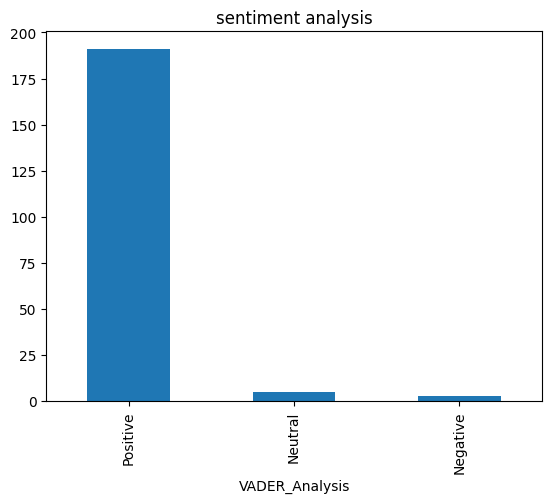

In [55]:
df.VADER_Analysis.value_counts().plot(kind='bar',title="sentiment analysis")

stop words - house, home, place , great, nice
- try dataset of 5000 random reviews (figure out a way to pull 1000 reviews from dataset)
- figure out a way to remove non-english words to keep only english 
- BUILD UP PREPROCESSING DATA, REFINE IT MORE 
- ANTHONY AND ASHLYE WILL PULL RANDOM DATSET THAT IS ALREADY PREPROCESSED
- INCREASE NUMBER OF TOPICS FOR TOPIC MODELING (LDA v. NMF)
- MANUALLY COMPARE SENTIMENT ANALYSIS OF VADER v. TEXTBLOB